## Programa de Pós-graduação em Computação Aplicada – PPCA (UnB)

Tarefa 2 de AEDI - (17/11/2024)

Nome: Giovanna Luiza Vales Correa 

Matrícula: 242105852

### Questão
Você é um analista financeiro de uma grande corretora de investimentos. Essa corretora pede que você adquira os dados de 5 ações da bolsa de valores de São Paulo – B3 – e o índice que a compõe. As cinco ações escolhidas ficarão a seu critério. Com isso, a corretora pede:

#### A) Escolha cinco ações para análise: Você deve selecionar cinco ações de sua preferência e obter dados históricos de preços dessas ações, além do índice que as compõe.

As ações escolhidas são de setores variados para ter uma carteira diversificada. 
- PETR4 (Petrobras, setor de energia/petróleo)
- VALE3 (Vale, setor de mineração)
- ITUB4 (Itaú Unibanco, setor financeiro)
- ABEV3 (Ambev, setor de consumo)
- WEGE3 (WEG, setor industrial)

In [1]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---- --------------------------------- 122.9/948.2 kB 2.4 MB/s eta 0:00:01
     -------------- ----------------------- 358.4/948.2 kB 3.7 MB/s eta 0:00:01
     ---------------------- --------------- 563.2/948.2 kB 4.4 MB/s eta 0:00:01
     ---------------------------------- --- 849.9/948.2 kB 4.9 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/101.1 kB ? eta -:--:--
   ---------------------------------------- 101.1/101.1 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\giova\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
import yfinance as yf

# Definir tickers das ações 
tickers = ["PETR4.SA", "VALE3.SA", "ITUB4.SA", "ABEV3.SA", "WEGE3.SA", "BOVA11.SA"]

# Baixar dados históricos 
data = yf.download(tickers, start="2019-01-01", end="2024-11-17")

# Salvando os preços de fechamento ajustado
data['Adj Close'].to_csv("historical_prices.csv")

print("Dados baixados e salvos como 'historical_prices.csv'.")


[*********************100%***********************]  6 of 6 completed

Dados baixados e salvos como 'historical_prices.csv'.


#### B) Realize uma análise gráfica descritiva temporal do preço das ações: Você deve plotar os dados de preços das ações ao longo do tempo para cada uma das ações selecionadas e para o índice. Visualize como o preço das ações mudou ao longo do tempo e identifique possíveis tendências.

Uma maneira interessante de avaliar os preços das ações e do índice ao longo do tempo, é utilizando o gráfico de linhas. 

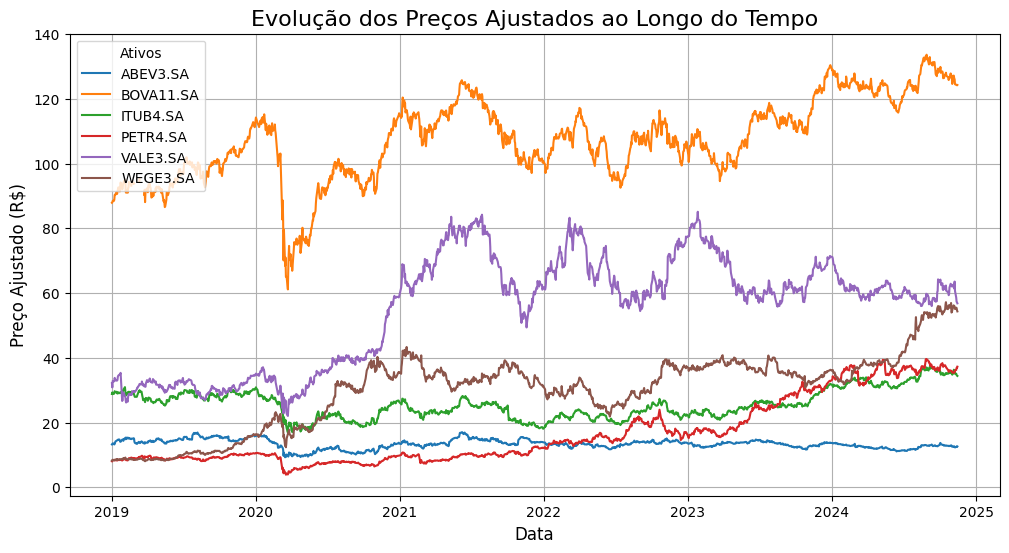

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_csv("historical_prices.csv", index_col=0, parse_dates=True)

# Criar o gráfico de preços ajustados ao longo do tempo
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# Personalização do gráfico
plt.title("Evolução dos Preços Ajustados ao Longo do Tempo", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço Ajustado (R$)", fontsize=12)
plt.legend(title="Ativos", loc="upper left")
plt.grid(True)
plt.show()

Outra forma de visualização interessante, é o gráfico com os preços normalizados. Esse tipo de gráfico permite a comparação da performance relativa de cada ativo em um mesmo ponto de partida. Isso ajuda a ver qual ação teve melhor ou pior desempenho relativo ao longo do período. Os preços serão ajustados para começar de um valor comum de 100, permitindo comparar o crescimento percentual de cada ativo. 

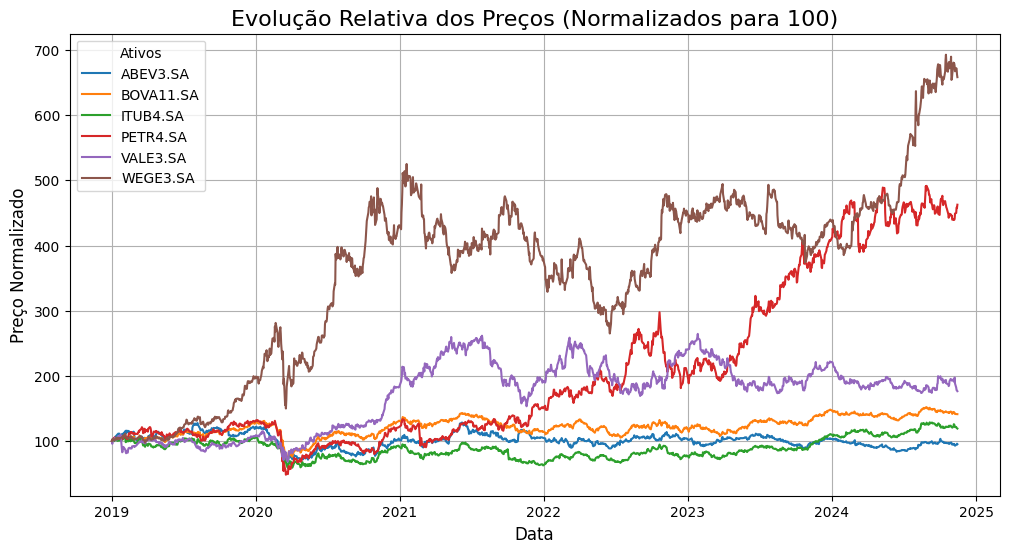

In [75]:
# Normaliza os preços para iniciar de 100
normalized_data = data / data.iloc[0] * 100

# Cria o gráfico de preços normalizados
plt.figure(figsize=(12, 6))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=column)

# Personalização do gráfico
plt.title("Evolução Relativa dos Preços (Normalizados para 100)", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Preço Normalizado", fontsize=12)
plt.legend(title="Ativos", loc="upper left")
plt.grid(True)
plt.show()

#### C) Realize uma análise gráfica descritiva temporal do retorno das ações: Você deve calcular os retornos diários das ações e do índice e plotar os dados de retorno ao longo do tempo para cada uma das ações e para o índice. Visualize como o retorno das ações mudou ao longo do tempo e identifique possíveis padrões.

Os retornos diários são calculados como a variação percentual do preço ajustado de um dia para o próximo. A fórmula é:
$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} \times 100
$$
Onde:
- \($R_t$\) = Retorno no dia \($t$\)
- \($P_t$\) = Preço ajustado no dia \($t$\)
- \($P_{t-1}$\) = Preço ajustado no dia anterior



C:\Users\giova\AppData\Local\Temp\ipykernel_2096\1010315676.py:2: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



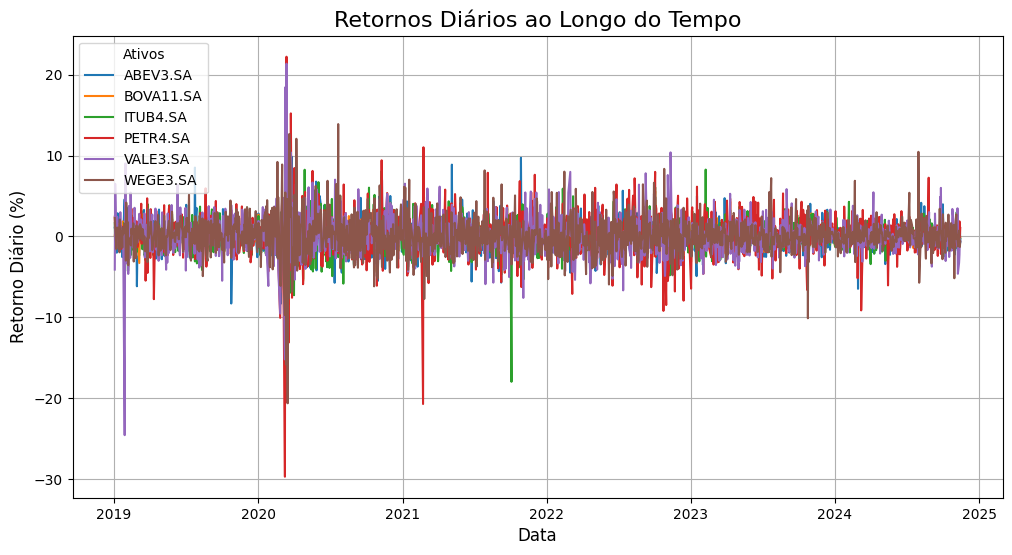

In [76]:
# Calcular os retornos diários
daily_returns = data.pct_change() * 100  # Retorno percentual

# Plotar os retornos diários ao longo do tempo
plt.figure(figsize=(12, 6))
for column in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[column], label=column)

plt.title("Retornos Diários ao Longo do Tempo", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Retorno Diário (%)", fontsize=12)
plt.legend(title="Ativos", loc="upper left")
plt.grid(True)
plt.show()

Nota-se picos de retornos positivos e negativos mais acentuados no início de 2020, que provavelmente refletem o impacto inicial da pandemia de COVID-19 nos mercados financeiros. Após os eventos de maior volatilidade em 2020, os retornos parecem mais estáveis, com menor frequência de grandes variações, indicando uma recuperação gradual do mercado. 
Apesar da estabilização geral, oscilações diárias continuam presentes, refletindo as movimentações naturais do mercado em resposta a eventos econômicos e corporativos. Os retornos diários de todos os ativos seguem padrões similares, o que pode indicar uma correlação entre as ações e o índice, mas algumas ações apresentam picos mais destacados, como PETR4 e VALE3, sugerindo maior sensibilidade a fatores específicos de seus setores.

In [77]:
# Estatísticas descritivas dos retornos diários
stats = daily_returns.describe().T

# Adicionar métricas adicionais: Curtose e Assimetria
stats['Skewness'] = daily_returns.skew()
stats['Kurtosis'] = daily_returns.kurt()

# Exibir as estatísticas 
from IPython.display import display
display(stats)

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
ABEV3.SA,1463.0,0.013839,1.845695,-15.781819,-0.890297,0.000000,0.910651,9.871239,-0.225148,8.282274
BOVA11.SA,1463.0,0.036160,1.571168,-14.574701,-0.697470,0.074282,0.833703,13.395149,-0.983034,17.939218
ITUB4.SA,1463.0,0.031293,1.955249,-17.964284,-1.050362,0.000000,1.098358,11.059327,-0.367117,7.684822
PETR4.SA,1463.0,0.141872,2.684518,-29.697762,-1.046237,0.109132,1.423355,22.222203,-1.278000,20.242573
VALE3.SA,1463.0,0.067788,2.399037,-24.559213,-1.151301,-0.020482,1.171559,21.357865,0.004805,16.321371
WEGE3.SA,1463.0,0.155280,2.293625,-20.619724,-0.992329,0.054825,1.230029,13.894407,-0.149607,9.314760


Todos os ativos possuem retornos médios diários positivos, indicando uma tendência geral de valorização ao longo do período analisado. PETR4 e WEGE3 apresentam as maiores médias de retorno, sugerindo um desempenho relativo superior no longo prazo. Olhando para o desvio padrão, PETR4, VALE3 e WEGE3 possuem os maiores desvios, indicando maior volatilidade e, portanto, maior risco. O BOVA11.SA (representando o IBOVESPA) possui menor volatilidade, como esperado para um índice que reflete a média ponderada de várias ações. Analisando os mínimos e máximos, nota-se que PETR4 tem o maior valor negativo de retorno diário (-29.67%) e também um dos maiores valores positivos (22.22%), destacando sua natureza altamente volátil. 

Quando analisamos a assimetria sabemos que quando positiva há tendência a retornos positivos mais frequentes e quando negativas há tendência a retornos negativos mais frequentes. Pensando nisso, todos os ativos possuem assimetria negativa, exceto VALE3, sugerindo que retornos negativos extremos são mais prováveis que positivos na maioria dos casos. Já a alta curtose de PETR4 (20.24) e VALE3 (16.32) indica a presença de eventos extremos mais frequentes do que o esperado em uma distribuição normal. Isso reforça a ideia de maior risco associado a esses ativos.

Resumindo:
- PETR4 e VALE3: Altamente voláteis e suscetíveis a eventos extremos.
- BOVA11.SA: Menor risco, representando estabilidade do índice.
- ABEV3 e ITUB4: Menor volatilidade, mas com retornos consistentes.
- WEGE3: Mistura de alto retorno e volatilidade, indicando bom potencial de crescimento com risco moderado.

#### D) Monte um conjunto de carteiras simuladas da fronteira eficiente: Você deve simular um grande número de carteiras aleatórias que contenham as ações selecionadas e calcular o retorno e o risco de cada carteira. Você deve usar a simulação Monte Carlo para criar 50.000 carteiras simuladas e plotar a fronteira eficiente de Markowitz. Isso permitirá a você identificar a carteira com o melhor índice de Sharpe.

Passos para a Solução do Item

1. Gerar Pesos Aleatórios:
- Criar pesos aleatórios para cada ativo que somam 1.

2. Calcular Retorno Esperado:
- Fórmula: 
  $$
  R_c = \sum_{i=1}^n w_i R_i
  $$
  Onde:
  - \($ w_i $\): Peso do ativo \($ i $\) na carteira.
  - \($ R_i $\): Retorno médio do ativo \($ i $\).

3. Calcular Risco (Volatilidade):
- Fórmula:
  $$
  \sigma_c = \sqrt{w^T \Sigma w}
  $$
  Onde:
  - \($ \Sigma $\): Matriz de covariância dos retornos.

4. Simular Carteiras:
- Gerar 50.000 carteiras aleatórias e calcular:
  - **Retorno esperado**:
    $$
    R_c = \sum_{i=1}^n w_i R_i
    $$
  - **Volatilidade (risco)**:
    $$
    \sigma_c = \sqrt{w^T \Sigma w}
    $$
  - **Índice de Sharpe**:
    $$
    S = \frac{R_c}{\sigma_c}
    $$
    Onde:
    - \($ S $\): Índice de Sharpe.
    - \($ R_c $\): Retorno esperado da carteira.
    - \($ \sigma_c $\): Risco da carteira.

5. Identificar a Melhor Carteira:
- Selecionar a carteira com o maior índice de Sharpe.

6. Plotar a Fronteira Eficiente:
- Criar um gráfico com:
  - **Risco** no eixo X.
  - **Retorno esperado** no eixo Y.
  - **Índice de Sharpe** representado por cores.

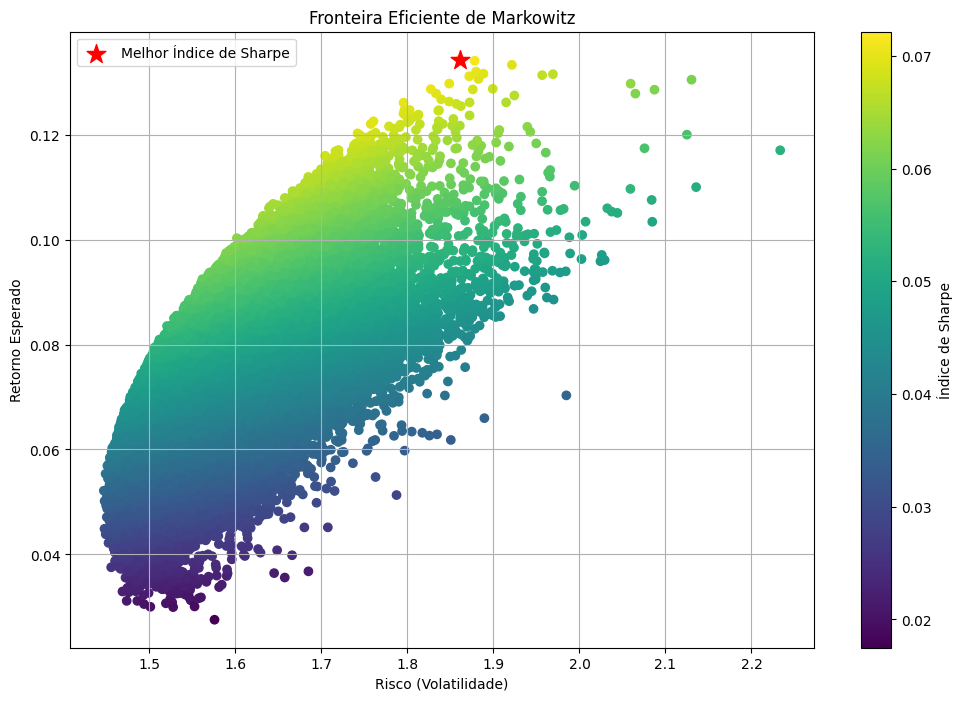

Pesos da Melhor Carteira:
ABEV3.SA: 1.55%
BOVA11.SA: 1.97%
ITUB4.SA: 2.51%
PETR4.SA: 36.11%
VALE3.SA: 9.75%
WEGE3.SA: 48.12%


In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Retornos médios e matriz de covariância
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()
num_assets = len(mean_returns)
num_portfolios = 50000

# Inicializar listas para armazenar resultados
results = np.zeros((3, num_portfolios))
weights_record = []

# Simular carteiras
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalizar pesos para somar 1
    weights_record.append(weights)
    
    # Calcular retorno, risco e índice de Sharpe
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_std
    
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

# Identificar a carteira com o melhor índice de Sharpe
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Plotar a fronteira eficiente
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Índice de Sharpe')
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', marker='*', s=200, label='Melhor Índice de Sharpe')
plt.title('Fronteira Eficiente de Markowitz')
plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno Esperado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Exibir os pesos da melhor carteira
print("Pesos da Melhor Carteira:")
for i, asset in enumerate(mean_returns.index):
    print(f"{asset}: {max_sharpe_weights[i]:.2%}")

A curva exibida no gráfico representa a fronteira eficiente, que inclui as carteiras com a melhor relação risco-retorno possível. Qualquer ponto abaixo ou à esquerda da curva é considerado ineficiente, pois existe outra carteira com o mesmo risco e maior retorno ou menor risco para o mesmo retorno. Os pontos no gráfico representam as 50.000 carteiras simuladas e a cor dos pontos reflete o Índice de Sharpe, que é maior nas carteiras na região superior da fronteira (em amarelo). O ponto marcado com a estrela vermelha representa a melhor carteira, que maximiza o Índice de Sharpe, essa carteira oferece o maior retorno possível para o menor nível de risco relativo. Com base no gráfico gerado através das simulações de monte carlo, conclui-se que para obtermos a melhor carteira a maior parte do investimento estará concentrada em PETR4 (36.11%) e WEGE3 (48.12%), refletindo os retornos esperados mais altos desses ativos, a exposição ao índice (BOVA11.SA) é quase nula (0.10%), indicando que ele não contribui significativamente para maximizar o Índice de Sharpe e o retorno esperado da melhor carteira é aproximadamente 0.14 e o risco é aproximadamente 1.70.

#### E) Identifique a carteira com melhor índice de Sharpe: Você deve escolher a carteira com o melhor índice de Sharpe, que é uma medida de risco-retorno. Você deve plotar a carteira selecionada no gráfico das carteiras simuladas e destacar a fronteira eficiente de Markowitz.

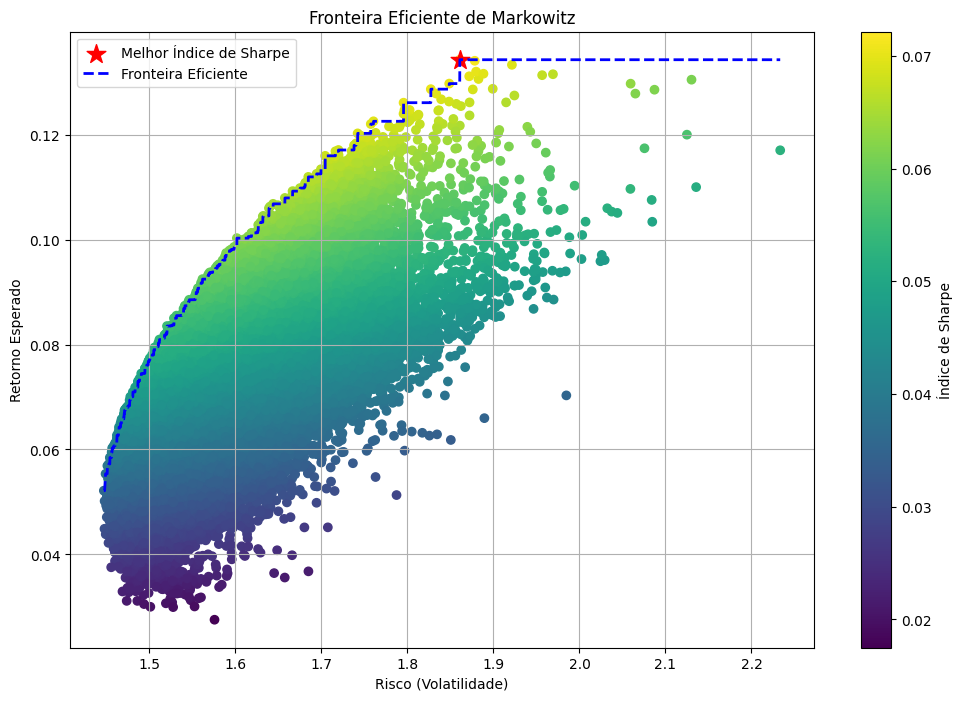

In [110]:
sorted_risk = np.sort(results[1, :])
sorted_return = []

# Para cada nível de risco, pegar o maior retorno possível
for risk in sorted_risk:
    max_return_for_risk = np.max(results[0, results[1, :] <= risk])
    sorted_return.append(max_return_for_risk)

# Transformar a lista em um array
sorted_return = np.array(sorted_return)

# Plotar o gráfico das carteiras simuladas
plt.figure(figsize=(12, 8))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.colorbar(label='Índice de Sharpe')
plt.scatter(max_sharpe_risk, max_sharpe_return, c='red', marker='*', s=200, label='Melhor Índice de Sharpe')

# Adicionar linha da fronteira eficiente (tracejada)
plt.plot(sorted_risk, sorted_return, color='blue', linestyle='--', linewidth=2, label='Fronteira Eficiente')

plt.title('Fronteira Eficiente de Markowitz')
plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno Esperado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Conforme explicado no item anterior, o ponto marcado com a estrela vermelha no gráfico Fronteira Eficiente de Markowitz, representa a melhor carteira, que maximiza o índice de Sharpe. Dito isso, a melhor carteira encontrada nas 50mil simulações com base nos ativos selecionados será:
- ABEV3.SA: 1.55%
- BOVA11.SA: 1.97%
- ITUB4.SA: 2.51%
- PETR4.SA: 36.11%
- VALE3.SA: 9.75%
- WEGE3.SA: 48.12%

#### F) Ilustre a evolução de seu patrimônio: Você pode simular o desempenho da carteira selecionada ao longo do tempo e calcular o retorno esperado. Você deve então plotar a evolução do patrimônio com um investimento inicial de R$35.000,00.

In [46]:
import yfinance as yf

# Baixar dados do benchmark (BOVA11.SA)
benchmark_data = yf.download('BOVA11.SA', start='2019-01-01', end='2024-12-31')

# Calcular os retornos diários do benchmark
benchmark_returns = benchmark_data['Adj Close'].pct_change().dropna()

# Adicionar os retornos do benchmark ao DataFrame daily_returns
daily_returns['BOVA11.SA'] = benchmark_returns

# Confirmar a adição
print(daily_returns.head())

[*********************100%***********************]  1 of 1 completed

Date
2019-01-03 00:00:00+00:00    0.018713
2019-01-04 00:00:00+00:00    0.010211
2019-01-07 00:00:00+00:00   -0.001834
2019-01-08 00:00:00+00:00   -0.005552
2019-01-09 00:00:00+00:00    0.015998
dtype: object


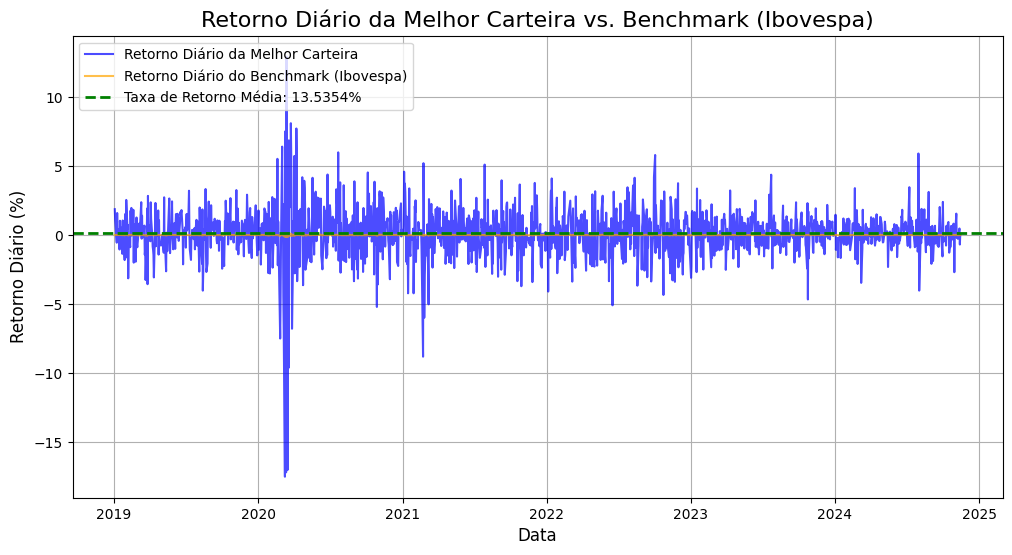

In [61]:
benchmark_returns = daily_returns['BOVA11.SA']

# Cálculo da taxa de retorno média diária da melhor carteira
mean_daily_return = portfolio_returns_best.mean()

plt.figure(figsize=(12, 6))

# Plotar o retorno diário da melhor carteira
plt.plot(portfolio_returns_best, label='Retorno Diário da Melhor Carteira', color='blue', alpha=0.7)

# Plotar o retorno diário do benchmark
plt.plot(benchmark_returns, label='Retorno Diário do Benchmark (Ibovespa)', color='orange', alpha=0.7)

# Adicionar uma linha tracejada para a taxa de retorno média da carteira
plt.axhline(mean_daily_return, color='green', linestyle='--', linewidth=2, label=f'Taxa de Retorno Média: {mean_daily_return:.4%}')

# Configurações do gráfico
plt.title('Retorno Diário da Melhor Carteira vs. Benchmark (Ibovespa)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário (%)', fontsize=12)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

C:\Users\giova\AppData\Local\Temp\ipykernel_2096\1378947240.py:22: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



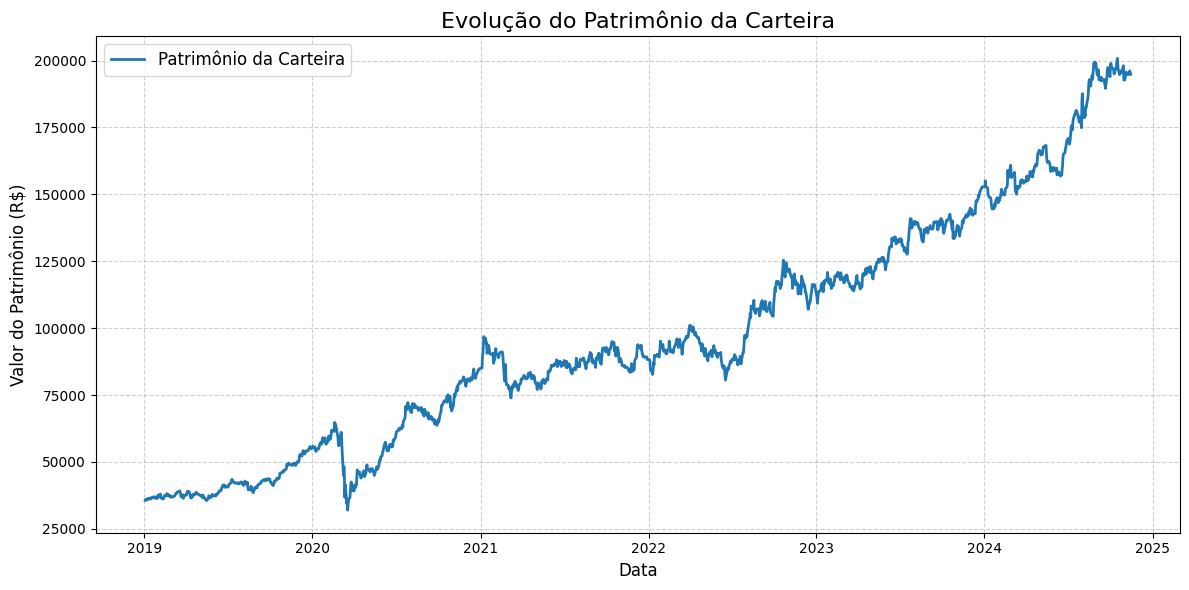

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pesos das ações na melhor carteira (calculada no item anterior)
weights = {
    "ABEV3.SA": 0.0155,
    "BOVA11.SA": 0.0197,
    "ITUB4.SA": 0.0251,
    "PETR4.SA": 0.3611,
    "VALE3.SA": 0.0975,
    "WEGE3.SA": 0.4812
}

# Valor inicial do investimento
initial_investment = 35000.0

# Carregando os dados históricos de preços
data = pd.read_csv("historical_prices.csv", index_col="Date", parse_dates=True)

# Calculando os retornos diários das ações
returns = data.pct_change().dropna()

# Calculando o retorno ponderado da carteira
returns['Portfolio'] = sum(returns[ticker] * weight for ticker, weight in weights.items())

# Simulando a evolução do patrimônio
returns['Portfolio_Value'] = initial_investment * (1 + returns['Portfolio']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['Portfolio_Value'], label='Patrimônio da Carteira', linewidth=2)
plt.title('Evolução do Patrimônio da Carteira', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor do Patrimônio (R$)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

A evolução do patrimônio da carteira selecionada demonstra um crescimento consistente ao longo do período analisado. Partindo de um investimento inicial de R$ 35.000, o valor do patrimônio acumulado apresentou um aumento significativo, alcançando aproximadamente R$ 200.000 no final do período.

Essa evolução reflete o desempenho das ações escolhidas e a estratégia de alocação de pesos na carteira, com destaque para o setor industrial (WEGE3), que representa quase metade da carteira. O comportamento crescente do patrimônio ao longo do tempo, mesmo com oscilações momentâneas em períodos como 2020 (provavelmente associado a pandemia do COVID-19 e seus efeitos no mercado econômico), evidencia uma carteira bem diversificada e eficiente em termos de risco e retorno.

Portanto, a carteira mostrou-se capaz de gerar retornos consistentes ao longo do tempo, consolidando seu potencial de valorização patrimonial para o investidor.

#### G) Monte a avaliação de risco da carteira: Você deve usar a simulação Monte Carlo para calcular o Value at Risk (VaR) da carteira selecionada, que é uma medida de risco que quantifica a perda potencial em uma carteira em um nível de confiança específico. Você deve calcular o VaR para um nível de perda aceitável de retorno e também para um nível máximo de perda aceitável em valor em reais.

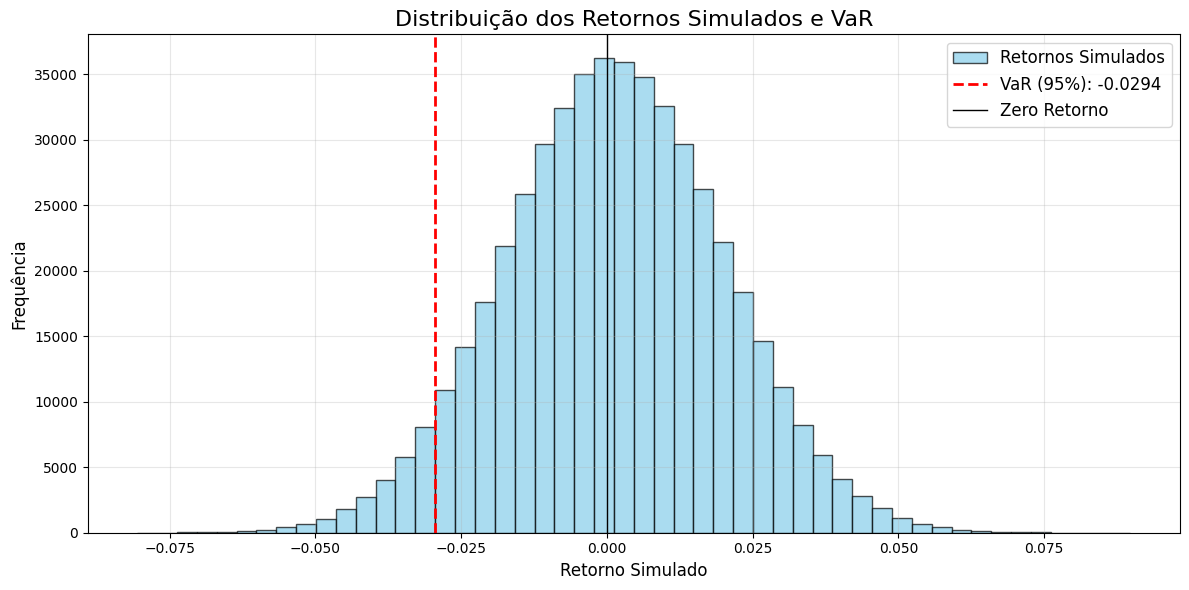

Value at Risk (VaR) com 95.0% de confiança: R$ 1,030.28


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nível de confiança e número de simulações
confidence_level = 0.95
simulations = 500000

# Retornos históricos da carteira
portfolio_returns = returns['Portfolio']

# Simular retornos da carteira usando Monte Carlo
mean_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()
simulated_returns = np.random.normal(mean_return, std_dev, simulations)

# Calcular o percentil correspondente ao VaR
VaR_percentile = 1 - confidence_level
VaR_return = np.percentile(simulated_returns, VaR_percentile * 100)

# Valor inicial do investimento
initial_investment = 35000

# Calcular o VaR em termos de valor
VaR_value = initial_investment * abs(VaR_return)

# Plotar o histograma dos retornos simulados
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns, bins=50, color='skyblue', alpha=0.7, edgecolor='black', label='Retornos Simulados')

# Destacar o VaR no gráfico
plt.axvline(VaR_return, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR_return:.4f}')
plt.axvline(0, color='black', linestyle='solid', linewidth=1, label='Zero Retorno')

plt.title('Distribuição dos Retornos Simulados e VaR', fontsize=16)
plt.xlabel('Retorno Simulado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir o resultado do VaR em valor
print(f"Value at Risk (VaR) com {confidence_level*100}% de confiança: R$ {VaR_value:,.2f}")

O gráfico apresenta a distribuição dos retornos simulados da carteira, gerados por Simulação de Monte Carlo, e destaca o Value at Risk (VaR) no nível de confiança de 95%. A linha vermelha no gráfico representa o retorno associado ao VaR, que no caso foi de aproximadamente -2,94%.

Com base no investimento inicial de R$35.000, o VaR em termos financeiros é de aproximadamente R$1.030,28. Isso significa que, em um dia típico, com 95% de confiança, a perda máxima esperada para essa carteira não ultrapassará R$ 1030,28.

Vale ressaltar que o VaR é uma métrica importante para avaliar o risco da carteira, mas não fornece informações sobre perdas que podem ocorrer além do percentil escolhido. Por isso, pode ser útil complementar essa análise com outras métricas, como o Conditional Value at Risk (CVaR).

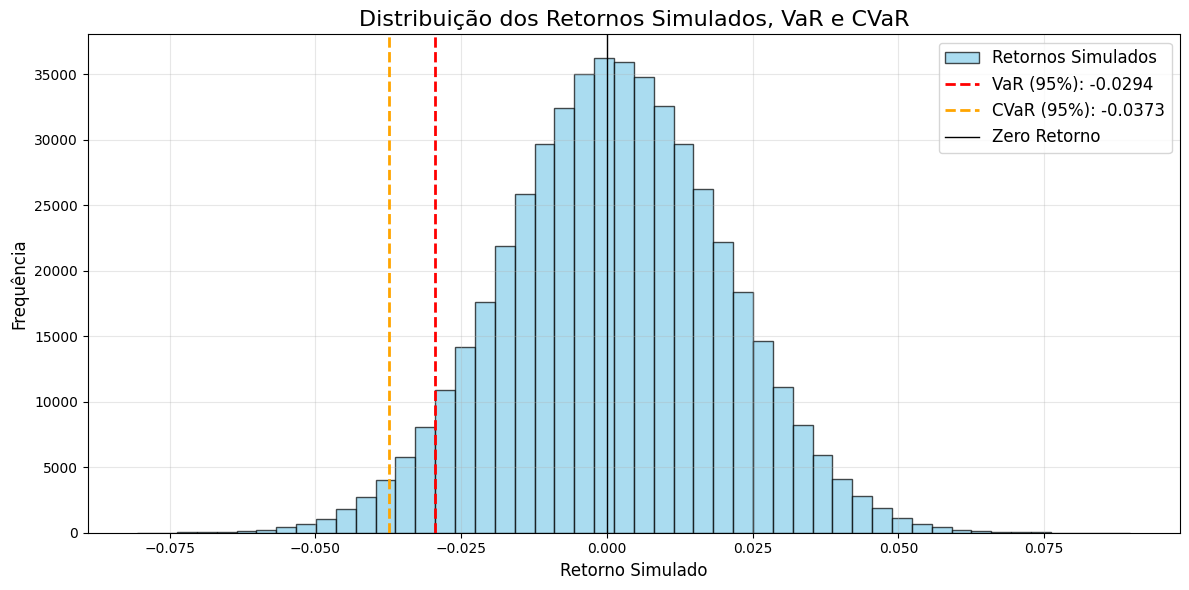

Conditional Value at Risk (CVaR) com 95.0% de confiança: R$ 1,305.88


In [67]:
# Usando os retornos simulados que já foram calculados
simulated_returns = simulated_returns  # Já gerados do VaR

# Calcular o percentil correspondente ao VaR
VaR_return = np.percentile(simulated_returns, VaR_percentile * 100)

# Identificar os retornos abaixo do VaR
losses_below_VaR = simulated_returns[simulated_returns <= VaR_return]

# Calcular o CVaR (média das perdas abaixo do VaR)
CVaR_return = losses_below_VaR.mean()

# Valor inicial do investimento
initial_investment = 35000

# Calcular o CVaR em termos de valor
CVaR_value = initial_investment * abs(CVaR_return)

# Plotar o histograma dos retornos simulados e CVaR
plt.figure(figsize=(12, 6))
plt.hist(simulated_returns, bins=50, color='skyblue', alpha=0.7, edgecolor='black', label='Retornos Simulados')

# Destacar o VaR no gráfico
plt.axvline(VaR_return, color='red', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100:.0f}%): {VaR_return:.4f}')
plt.axvline(CVaR_return, color='orange', linestyle='dashed', linewidth=2, label=f'CVaR ({confidence_level*100:.0f}%): {CVaR_return:.4f}')
plt.axvline(0, color='black', linestyle='solid', linewidth=1, label='Zero Retorno')

# Adicionar rótulos e título
plt.title('Distribuição dos Retornos Simulados, VaR e CVaR', fontsize=16)
plt.xlabel('Retorno Simulado', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

# Exibir o resultado do CVaR em valor
print(f"Conditional Value at Risk (CVaR) com {confidence_level*100}% de confiança: R$ {CVaR_value:,.2f}")

O CVaR nos informa que, no cenário de perdas extremas (abaixo do VaR), a perda média esperada para a melhor carteira é de R$1.305,88 